In [168]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from robomission import *
from time_series_models import *
from task_models import *
from student_models import *
from regression_models import *
from clustering_models import *
from helpers import *
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
train = pd.read_csv("train_eng_3.csv")
test = pd.read_csv("test_eng_3.csv")

In [148]:
train["item_mean_time"] = 0.0; test["item_mean_time"] = 0.0

In [131]:
train["item_mean_time_box"] = 0.0; test["item_mean_time_box"] = 0.0

In [129]:
solved_attempts = train_[train_["solved"] == True]
solved_attempts = solved_attempts[solved_attempts["time"] > 0.0]
a = boxcox(solved_attempts["time"], lmbda=None)[0]
solved_attempts["time_box"] = a
t_box = solved_attempts.groupby("item")["time_box"].mean()

In [149]:
for i,r in train.iterrows():
    train.at[i, "item_mean_time"] = t.get(r["item"])

In [150]:
for i,r in test.iterrows():
    test.at[i, "item_mean_time"] = t.get(r["item"])

In [348]:
train_ = train.drop(get_redundant_columns(), axis=1)
test_ = test.drop(get_redundant_columns(), axis=1)

In [136]:
train_ = train_.drop(["item_mean_time"], axis=1)
test_ = test_.drop(["item_mean_time"], axis=1)

In [156]:
train_ = train_.drop(["item_mean_time_box"], axis=1); test_ = test_.drop(["item_mean_time_box"], axis=1)

In [364]:
models = [
    LinearRegressionModel(),
    RidgeRegressionModel(),
    LassoRegressionModel(),
    ElasticNetModel()
]
%time eval_results_simple = eval_models_for_seminar_report(models, train_, test_)

Evaluating LinearRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.844

Evaluating RidgeRegressionModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



Results: RMSE 0.844

Evaluating LassoRegressionModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



Results: RMSE 0.844

Evaluating ElasticNetModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



Results: RMSE 0.844

Wall time: 3min 52s


In [349]:
train_ = train_.drop(["item_mean_time_box", "itemDifficulty"], axis=1); test_ = test_.drop(["item_mean_time_box", "itemDifficulty"], axis=1)

In [351]:
#train_
#train_['timeSinceLastSolving']=train_.timeSinceLastSolving.mask(str(train_.timeSinceLastSolving) == "-inf",0)
#test_["timeSinceLastSolving"] = np.where(test_["timeSinceLastSolving"] == 0.0, test_["timeSinceLastSolving"].max(), test_["timeSinceLastSolving"])
test_["timeSinceLastSolving"] = np.log1p(test_["timeSinceLastSolving"])
train_["timeSinceLastSolving"] = np.log1p(train_["timeSinceLastSolving"])

In [352]:
train_

id  student  item                             start  item_order  \
0           4       29     2  2017-11-10 12:20:05.152265+00:00           5   
1           5       29    12  2017-11-10 12:20:32.155447+00:00          13   
2           6       29    10  2017-11-10 12:20:54.080259+00:00          11   
3           7       29    14  2017-11-10 12:21:06.966330+00:00           7   
4           8       29    11  2017-11-10 12:21:33.061485+00:00          18   
5           9       29     1  2017-11-10 12:22:14.768707+00:00          19   
6          10       29     3  2017-11-10 12:22:42.455442+00:00          29   
7          11       29    49  2017-11-10 12:23:06.409399+00:00           2   
8          12       29    17  2017-11-10 12:23:23.127216+00:00          31   
9          13       29     8  2017-11-10 12:24:07.602156+00:00          12   
10         16      584     2  2017-11-12 08:33:42.535936+00:00           5   
11         17      584    31  2017-11-12 08:36:17.796933+00:00           6   
12         18      584    12  2017-11-12 08:37:31.844203+00:00          13   
13         19      584     8  2017-11-12 08:38:23.728383+00:00          12   
14         20      584     6  2017-11-12 08:39:19.885045+00:00          14   
15         21      584    13  2017-11-12 08:42:03.346800+00:00          24   
16         22      584    23  2017-11-12 08:45:31.357977+00:00          15   
17         23      584    21  2017-11-12 08:47:03.994079+00:00          25   
18         24      584     3  2017-11-12 08:48:30.172061+00:00          29   
19         25      584    53  2017-11-12 08:49:58.723520+00:00          30   
20         26      584    17  2017-11-12 08:50:37.636168+00:00          31   
21         27      584    50  2017-11-12 08:53:25.954833+00:00          39   
22         28      584    41  2017-11-12 08:57:39.741460+00:00          32   
23         30      584    37  2017-11-12 08:59:24.912358+00:00          38   
24         31      584    60  2017-11-12 09:00:34.676681+00:00          51   
25         32      584    55  2017-11-12 09:06:42.290558+00:00          41   
26         34      769    31  2017-11-12 23:27:20.552363+00:00           6   
27         35      769    49  2017-11-12 23:29:22.225442+00:00           2   
28         38      909    26  2017-11-13 10:27:27.617132+00:00           4   
29         39      917    26  2017-11-13 10:58:19.666306+00:00           4   
...       ...      ...   ...                               ...         ...   
98196  107632    16373     8  2019-03-30 09:29:22.214979+00:00          12   
98197  107633    16373    12  2019-03-30 09:30:06.975628+00:00          13   
98198  107634    16373     6  2019-03-30 09:30:40.406525+00:00          14   
98199  107635    16373    23  2019-03-30 09:32:04.423908+00:00          15   
98200  107636    16373    19  2019-03-30 09:33:13.821232+00:00          16   
98201  107637    16373    79  2019-03-30 09:36:45.398781+00:00          17   
98202  107638    16373    11  2019-03-30 09:38:23.376115+00:00          18   
98203  107639    16373     1  2019-03-30 09:39:01.585215+00:00          19   
98204  107640    16373    71  2019-03-30 09:40:40.440520+00:00          20   
98205  107641    16373    70  2019-03-30 09:42:05.810300+00:00          21   
98206  107642    16373    76  2019-03-30 09:43:57.187639+00:00          22   
98207  107643    16374    51  2019-03-31 09:43:57.077720+00:00           1   
98208  107644    16374    44  2019-03-31 09:44:11.708501+00:00           3   
98209  107645    16374    67  2019-03-31 09:44:24.762726+00:00           8   
98210  107646    16374    10  2019-03-31 09:44:43.344046+00:00          11   
98211  107647    16374    12  2019-03-31 09:44:55.601362+00:00          13   
98212  107648    16374    79  2019-03-31 09:45:12.104916+00:00          17   
98213  107649    16374    19  2019-03-31 09:46:53.475309+00:00          16   
98214  107650    16374     1  2019-03-31 09:48:03.797545+00:00          19   
98215  107651    16374    84  201

In [374]:
train_.drop(["item_mean_time", "timeSinceLastSolving"], axis=1)

id  student  item                             start  item_order  \
0           4       29     2  2017-11-10 12:20:05.152265+00:00           5   
1           5       29    12  2017-11-10 12:20:32.155447+00:00          13   
2           6       29    10  2017-11-10 12:20:54.080259+00:00          11   
3           7       29    14  2017-11-10 12:21:06.966330+00:00           7   
4           8       29    11  2017-11-10 12:21:33.061485+00:00          18   
5           9       29     1  2017-11-10 12:22:14.768707+00:00          19   
6          10       29     3  2017-11-10 12:22:42.455442+00:00          29   
7          11       29    49  2017-11-10 12:23:06.409399+00:00           2   
8          12       29    17  2017-11-10 12:23:23.127216+00:00          31   
9          13       29     8  2017-11-10 12:24:07.602156+00:00          12   
10         16      584     2  2017-11-12 08:33:42.535936+00:00           5   
11         17      584    31  2017-11-12 08:36:17.796933+00:00           6   
12         18      584    12  2017-11-12 08:37:31.844203+00:00          13   
13         19      584     8  2017-11-12 08:38:23.728383+00:00          12   
14         20      584     6  2017-11-12 08:39:19.885045+00:00          14   
15         21      584    13  2017-11-12 08:42:03.346800+00:00          24   
16         22      584    23  2017-11-12 08:45:31.357977+00:00          15   
17         23      584    21  2017-11-12 08:47:03.994079+00:00          25   
18         24      584     3  2017-11-12 08:48:30.172061+00:00          29   
19         25      584    53  2017-11-12 08:49:58.723520+00:00          30   
20         26      584    17  2017-11-12 08:50:37.636168+00:00          31   
21         27      584    50  2017-11-12 08:53:25.954833+00:00          39   
22         28      584    41  2017-11-12 08:57:39.741460+00:00          32   
23         30      584    37  2017-11-12 08:59:24.912358+00:00          38   
24         31      584    60  2017-11-12 09:00:34.676681+00:00          51   
25         32      584    55  2017-11-12 09:06:42.290558+00:00          41   
26         34      769    31  2017-11-12 23:27:20.552363+00:00           6   
27         35      769    49  2017-11-12 23:29:22.225442+00:00           2   
28         38      909    26  2017-11-13 10:27:27.617132+00:00           4   
29         39      917    26  2017-11-13 10:58:19.666306+00:00           4   
...       ...      ...   ...                               ...         ...   
98196  107632    16373     8  2019-03-30 09:29:22.214979+00:00          12   
98197  107633    16373    12  2019-03-30 09:30:06.975628+00:00          13   
98198  107634    16373     6  2019-03-30 09:30:40.406525+00:00          14   
98199  107635    16373    23  2019-03-30 09:32:04.423908+00:00          15   
98200  107636    16373    19  2019-03-30 09:33:13.821232+00:00          16   
98201  107637    16373    79  2019-03-30 09:36:45.398781+00:00          17   
98202  107638    16373    11  2019-03-30 09:38:23.376115+00:00          18   
98203  107639    16373     1  2019-03-30 09:39:01.585215+00:00          19   
98204  107640    16373    71  2019-03-30 09:40:40.440520+00:00          20   
98205  107641    16373    70  2019-03-30 09:42:05.810300+00:00          21   
98206  107642    16373    76  2019-03-30 09:43:57.187639+00:00          22   
98207  107643    16374    51  2019-03-31 09:43:57.077720+00:00           1   
98208  107644    16374    44  2019-03-31 09:44:11.708501+00:00           3   
98209  107645    16374    67  2019-03-31 09:44:24.762726+00:00           8   
98210  107646    16374    10  2019-03-31 09:44:43.344046+00:00          11   
98211  107647    16374    12  2019-03-31 09:44:55.601362+00:00          13   
98212  107648    16374    79  2019-03-31 09:45:12.104916+00:00          17   
98213  107649    16374    19  2019-03-31 09:46:53.475309+00:00          16   
98214  107650    16374     1  2019-03-31 09:48:03.797545+00:00          19   
98215  107651    16374    84  201

In [379]:
models = [#0.847402791
    LinearRegressionModel()
]
%time eval_results_simple = eval_models_for_seminar_report(models, train_.drop(["item_mean_time"], axis=1), test_.drop(["item_mean_time"], axis=1))

Evaluating LinearRegressionModel().
Scenario: 'as-observed'.
Results: RMSE 0.963

Wall time: 1min 6s


In [366]:
eval_results_simple

({'linear-regression-as-observed': {'mean': 0.8441527985404915},
  'ridge-regression-as-observed': {'mean': 0.8441507328067163},
  'lasso-regression-as-observed': {'mean': 0.8438924493677975},
  'elastic-net-as-observed': {'mean': 0.8439173727205806}},
 [3.4653626758667975,
  3.285730834634017,
  3.409216178855491,
  3.5146116895114723,
  3.167483794535346,
  3.8751325940681567,
  5.996899609091119,
  5.355071070147243,
  4.87656320081515,
  3.4609984901325337,
  3.4609984901325337,
  3.2625092716153725,
  3.4609984901325337,
  3.4609984901325337,
  3.5140219467419893,
  3.4609984901325337,
  3.5111114284653793,
  3.5221358448783175,
  3.135958872163249,
  3.2766854764815836,
  4.557459304781019,
  3.831082270663141,
  3.417821330782548,
  3.5234986550456293,
  3.4609984901325337,
  3.4609984901325337,
  5.377180704112598,
  3.154288009061525,
  3.43983504006356,
  3.4361549077202778,
  3.4609984901325337,
  3.138863336466222,
  3.4609984901325337,
  3.2997093538325624,
  3.82591017401

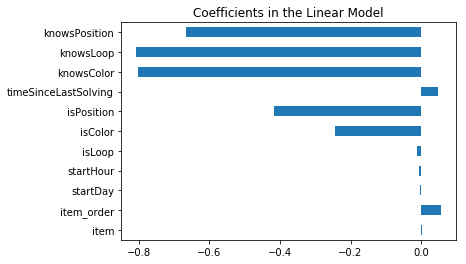

In [380]:
feature_importances(models[0].debug()[0].coef_[0], ['item', 'item_order', 'startDay', 'startHour',
       'isLoop', 'isColor', 'isPosition', 'timeSinceLastSolving', 'knowsColor',
       'knowsLoop', 'knowsPosition'])

In [354]:
eval_results_simple

({'linear-regression-as-observed': {'mean': 0.8441527985404915}},
 [array([3.46180469]),
  array([3.28442276]),
  array([3.40882261]),
  array([3.51380906]),
  array([3.1679255]),
  array([3.87725859]),
  array([6.02470484]),
  array([5.39404125]),
  array([4.89014585]),
  array([3.45760036]),
  array([3.45760036]),
  array([3.2609131]),
  array([3.45760036]),
  array([3.45760036]),
  array([3.51346883]),
  array([3.45760036]),
  array([3.50943966]),
  array([3.52072596]),
  array([3.13591525]),
  array([3.27542606]),
  array([4.56150501]),
  array([3.8324254]),
  array([3.41887569]),
  array([3.52212114]),
  array([3.45760036]),
  array([3.45760036]),
  array([5.3827682]),
  array([3.15467978]),
  array([3.43937745]),
  array([3.43524398]),
  array([3.45760036]),
  array([3.13888871]),
  array([3.45760036]),
  array([3.29899685]),
  array([3.82713044]),
  array([3.36037721]),
  array([3.85958415]),
  array([3.36339343]),
  array([3.51822583]),
  array([3.42735902]),
  array([3.5147832

In [165]:
train_

id  student  item                             start  item_order  \
0           4       29     2  2017-11-10 12:20:05.152265+00:00           5   
1           5       29    12  2017-11-10 12:20:32.155447+00:00          13   
2           6       29    10  2017-11-10 12:20:54.080259+00:00          11   
3           7       29    14  2017-11-10 12:21:06.966330+00:00           7   
4           8       29    11  2017-11-10 12:21:33.061485+00:00          18   
5           9       29     1  2017-11-10 12:22:14.768707+00:00          19   
6          10       29     3  2017-11-10 12:22:42.455442+00:00          29   
7          11       29    49  2017-11-10 12:23:06.409399+00:00           2   
8          12       29    17  2017-11-10 12:23:23.127216+00:00          31   
9          13       29     8  2017-11-10 12:24:07.602156+00:00          12   
10         16      584     2  2017-11-12 08:33:42.535936+00:00           5   
11         17      584    31  2017-11-12 08:36:17.796933+00:00           6   
12         18      584    12  2017-11-12 08:37:31.844203+00:00          13   
13         19      584     8  2017-11-12 08:38:23.728383+00:00          12   
14         20      584     6  2017-11-12 08:39:19.885045+00:00          14   
15         21      584    13  2017-11-12 08:42:03.346800+00:00          24   
16         22      584    23  2017-11-12 08:45:31.357977+00:00          15   
17         23      584    21  2017-11-12 08:47:03.994079+00:00          25   
18         24      584     3  2017-11-12 08:48:30.172061+00:00          29   
19         25      584    53  2017-11-12 08:49:58.723520+00:00          30   
20         26      584    17  2017-11-12 08:50:37.636168+00:00          31   
21         27      584    50  2017-11-12 08:53:25.954833+00:00          39   
22         28      584    41  2017-11-12 08:57:39.741460+00:00          32   
23         30      584    37  2017-11-12 08:59:24.912358+00:00          38   
24         31      584    60  2017-11-12 09:00:34.676681+00:00          51   
25         32      584    55  2017-11-12 09:06:42.290558+00:00          41   
26         34      769    31  2017-11-12 23:27:20.552363+00:00           6   
27         35      769    49  2017-11-12 23:29:22.225442+00:00           2   
28         38      909    26  2017-11-13 10:27:27.617132+00:00           4   
29         39      917    26  2017-11-13 10:58:19.666306+00:00           4   
...       ...      ...   ...                               ...         ...   
98196  107632    16373     8  2019-03-30 09:29:22.214979+00:00          12   
98197  107633    16373    12  2019-03-30 09:30:06.975628+00:00          13   
98198  107634    16373     6  2019-03-30 09:30:40.406525+00:00          14   
98199  107635    16373    23  2019-03-30 09:32:04.423908+00:00          15   
98200  107636    16373    19  2019-03-30 09:33:13.821232+00:00          16   
98201  107637    16373    79  2019-03-30 09:36:45.398781+00:00          17   
98202  107638    16373    11  2019-03-30 09:38:23.376115+00:00          18   
98203  107639    16373     1  2019-03-30 09:39:01.585215+00:00          19   
98204  107640    16373    71  2019-03-30 09:40:40.440520+00:00          20   
98205  107641    16373    70  2019-03-30 09:42:05.810300+00:00          21   
98206  107642    16373    76  2019-03-30 09:43:57.187639+00:00          22   
98207  107643    16374    51  2019-03-31 09:43:57.077720+00:00           1   
98208  107644    16374    44  2019-03-31 09:44:11.708501+00:00           3   
98209  107645    16374    67  2019-03-31 09:44:24.762726+00:00           8   
98210  107646    16374    10  2019-03-31 09:44:43.344046+00:00          11   
98211  107647    16374    12  2019-03-31 09:44:55.601362+00:00          13   
98212  107648    16374    79  2019-03-31 09:45:12.104916+00:00          17   
98213  107649    16374    19  2019-03-31 09:46:53.475309+00:00          16   
98214  107650    16374     1  2019-03-31 09:48:03.797545+00:00          19   
98215  107651    16374    84  201

In [373]:
models = [
    RandomForestModel()
]
%time eval_results_simple = eval_models_for_seminar_report(models, train_, test_)

Evaluating RandomForestModel().
Scenario: 'as-observed'.


C:\schoolspace\adaptive\regression_models.py:472: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KeyboardInterrupt: 

In [367]:
models = [
    AdaBoostRegressorModel(),
    HuberRegressorModel(),
    BaggingRegressorModel(),
    BayesianRidgeModel()
]
%time eval_results_simple = eval_models_for_seminar_report(models, train_, test_)

Evaluating AdaBoostRegressorModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Results: RMSE 1.208

Evaluating HuberRegressorModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Results: RMSE 0.848

Evaluating BaggingRegressorModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:397: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Results: RMSE 0.911

Evaluating BayesianRidgeModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Results: RMSE 0.844

Wall time: 4min 54s


In [314]:
models = [
    LinearRegressionModel()
]
%time eval_results_simple = eval_models_for_seminar_report(models, , test_)

Evaluating LinearRegressionModel().
Scenario: 'as-observed'.


ValueError: could not convert string to float: 'lrf'

In [ ]:
a

In [120]:
models[0].debug()[1]

Index(['id', 'student', 'item', 'item_order', 'startDay', 'startHour',
       'isLoop', 'isColor', 'isPosition', 'timeSinceLastSolving', 'knowsColor',
       'knowsLoop', 'knowsPosition', 'itemDifficulty', 'item_mean_time'],
      dtype='object')

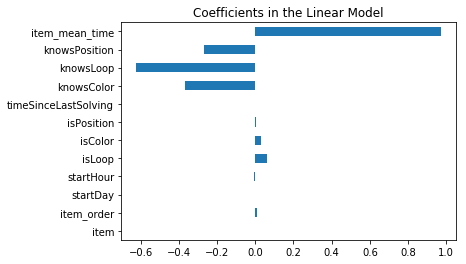

In [122]:
feature_importances(models[0].debug()[0].coef_[0], ['item', 'item_order', 'startDay', 'startHour',
       'isLoop', 'isColor', 'isPosition', 'timeSinceLastSolving', 'knowsColor',
       'knowsLoop', 'knowsPosition', 'item_mean_time'])

In [322]:
train_ = train.drop(get_redundant_columns(), axis=1)
test_ = test.drop(get_redundant_columns(), axis=1)

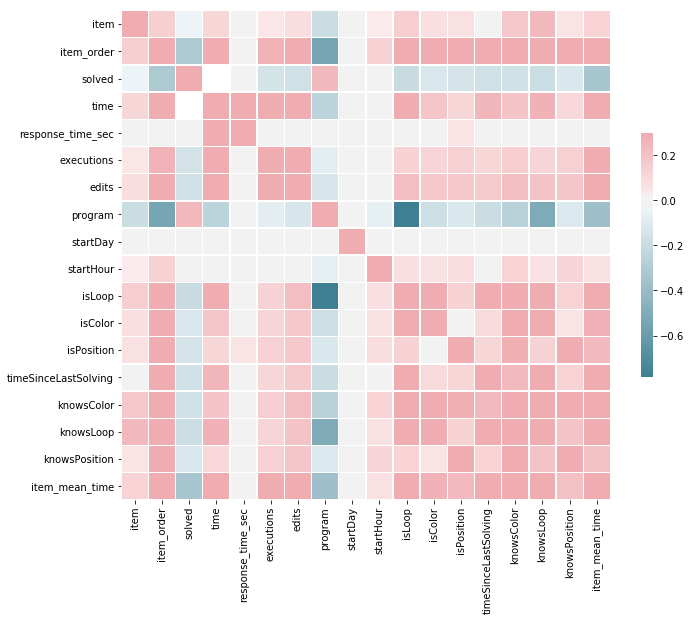

In [372]:
test_.drop(["id", "student"], axis=1)
heat_map_2(test_.drop(["id", "student"], axis=1))

In [328]:
train_

id  student  item                             start  item_order  \
0           4       29     2  2017-11-10 12:20:05.152265+00:00           5   
1           5       29    12  2017-11-10 12:20:32.155447+00:00          13   
2           6       29    10  2017-11-10 12:20:54.080259+00:00          11   
3           7       29    14  2017-11-10 12:21:06.966330+00:00           7   
4           8       29    11  2017-11-10 12:21:33.061485+00:00          18   
5           9       29     1  2017-11-10 12:22:14.768707+00:00          19   
6          10       29     3  2017-11-10 12:22:42.455442+00:00          29   
7          11       29    49  2017-11-10 12:23:06.409399+00:00           2   
8          12       29    17  2017-11-10 12:23:23.127216+00:00          31   
9          13       29     8  2017-11-10 12:24:07.602156+00:00          12   
10         16      584     2  2017-11-12 08:33:42.535936+00:00           5   
11         17      584    31  2017-11-12 08:36:17.796933+00:00           6   
12         18      584    12  2017-11-12 08:37:31.844203+00:00          13   
13         19      584     8  2017-11-12 08:38:23.728383+00:00          12   
14         20      584     6  2017-11-12 08:39:19.885045+00:00          14   
15         21      584    13  2017-11-12 08:42:03.346800+00:00          24   
16         22      584    23  2017-11-12 08:45:31.357977+00:00          15   
17         23      584    21  2017-11-12 08:47:03.994079+00:00          25   
18         24      584     3  2017-11-12 08:48:30.172061+00:00          29   
19         25      584    53  2017-11-12 08:49:58.723520+00:00          30   
20         26      584    17  2017-11-12 08:50:37.636168+00:00          31   
21         27      584    50  2017-11-12 08:53:25.954833+00:00          39   
22         28      584    41  2017-11-12 08:57:39.741460+00:00          32   
23         30      584    37  2017-11-12 08:59:24.912358+00:00          38   
24         31      584    60  2017-11-12 09:00:34.676681+00:00          51   
25         32      584    55  2017-11-12 09:06:42.290558+00:00          41   
26         34      769    31  2017-11-12 23:27:20.552363+00:00           6   
27         35      769    49  2017-11-12 23:29:22.225442+00:00           2   
28         38      909    26  2017-11-13 10:27:27.617132+00:00           4   
29         39      917    26  2017-11-13 10:58:19.666306+00:00           4   
...       ...      ...   ...                               ...         ...   
98196  107632    16373     8  2019-03-30 09:29:22.214979+00:00          12   
98197  107633    16373    12  2019-03-30 09:30:06.975628+00:00          13   
98198  107634    16373     6  2019-03-30 09:30:40.406525+00:00          14   
98199  107635    16373    23  2019-03-30 09:32:04.423908+00:00          15   
98200  107636    16373    19  2019-03-30 09:33:13.821232+00:00          16   
98201  107637    16373    79  2019-03-30 09:36:45.398781+00:00          17   
98202  107638    16373    11  2019-03-30 09:38:23.376115+00:00          18   
98203  107639    16373     1  2019-03-30 09:39:01.585215+00:00          19   
98204  107640    16373    71  2019-03-30 09:40:40.440520+00:00          20   
98205  107641    16373    70  2019-03-30 09:42:05.810300+00:00          21   
98206  107642    16373    76  2019-03-30 09:43:57.187639+00:00          22   
98207  107643    16374    51  2019-03-31 09:43:57.077720+00:00           1   
98208  107644    16374    44  2019-03-31 09:44:11.708501+00:00           3   
98209  107645    16374    67  2019-03-31 09:44:24.762726+00:00           8   
98210  107646    16374    10  2019-03-31 09:44:43.344046+00:00          11   
98211  107647    16374    12  2019-03-31 09:44:55.601362+00:00          13   
98212  107648    16374    79  2019-03-31 09:45:12.104916+00:00          17   
98213  107649    16374    19  2019-03-31 09:46:53.475309+00:00          16   
98214  107650    16374     1  2019-03-31 09:48:03.797545+00:00          19   
98215  107651    16374    84  201

In [318]:
test_d = test_.drop(get_redundant_columns(), axis=1); train_d = train_.drop(get_redundant_columns(), axis=1)

KeyError: "['startMonth' 'startIs_quarter_end' 'event_order' 'isMorning'\n 'startIs_year_start' 'startSecond' 'isWeekend' 'startIs_month_end'\n 'startYear' 'isSummerHolidays' 'startDayofweek' 'startElapsed'\n 'isShortlyBeforeBreak' 'item_setting' 'item_solution'\n 'startIs_month_start' 'startDayofyear' 'startWeek' 'isAfternoon'\n 'startIs_quarter_start' 'isEvening' 'isStateHolidays' 'isNight'\n 'isSchoolWorkingHours' 'isSchoolBreak' 'startIs_year_end' 'startMinute'] not found in axis"

In [45]:
train_ = train.drop(["item_solution"], axis=1)
test_ = test.drop(["item_solution"], axis=1)

- https://www.kaggle.com/miguelangelnieto/pca-and-regression

nieco na sposob
```
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)

model.fit(X_pca,y)
```

In [35]:
models = [
    KNeighborsRegressorModel()
]
%time eval_results_simple_timeseries = eval_models_for_seminar_report(models, train_, test_)

Evaluating KNeighborsRegressorModel().
Scenario: 'as-observed'.
Results: RMSE 0.849

Wall time: 1min 17s


In [50]:
models = [
    PCRModel()
]
%time eval_results_simple_timeseries = eval_models_for_seminar_report(models, train_, test_)

Evaluating PCRModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


ValueError: n_components=40 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


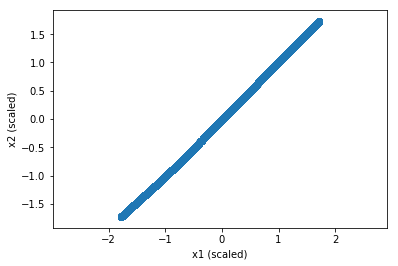

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_.drop(get_performance_columns(), axis=1))
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])

# Put plot axes on the same scale
plt.axis('equal')

# Label axes
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')

# Clear text residue
plt.show()

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_.drop(["start"], axis=1))
X_test_scaled = scaler.fit_transform(test_.drop(["start"], axis=1))



C:\Users\terez\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [70]:
models = [
    LassoRegressionModel()
]
%time eval_results_linreg = eval_models_for_seminar_report(models, train_, test_)

Evaluating LassoRegressionModel().
Scenario: 'as-observed'.


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Results: RMSE 0.859

Wall time: 47 s


In [298]:
train_ = pd.read_csv("train_eng_3.csv");
train_solved = train_[train_["solved"] == True]

In [299]:
train_solved["time_int"] = np.rint(train_solved.time.values)

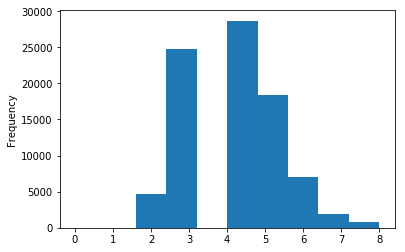

In [300]:
train_solved["time_int"].plot.hist()

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


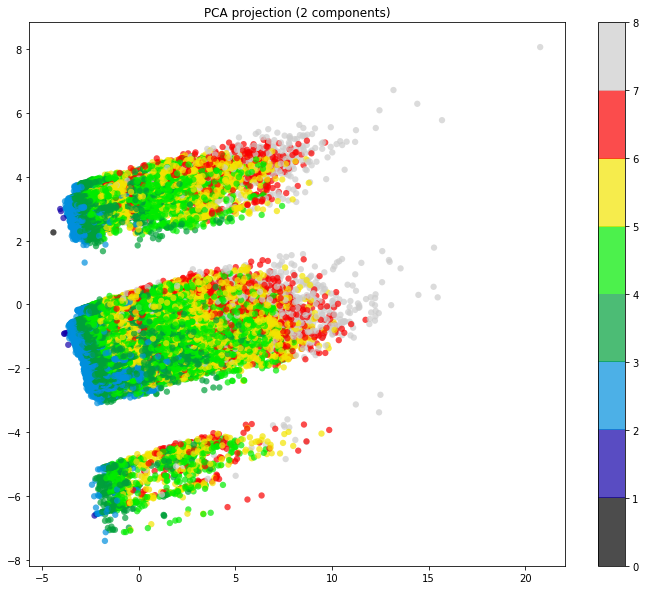

In [212]:
X = train_solved.drop(["start", "item_solution"], axis=1)

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_std)

plt.figure(figsize=(12,10))
plt.scatter(reduced[:, 0], reduced[:, 1], c=train_solved["time_int"], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 8))
plt.colorbar()
plt.title('PCA projection (2 components)');

Text(0.5, 1.0, "Single Variable's Exlained Variance")

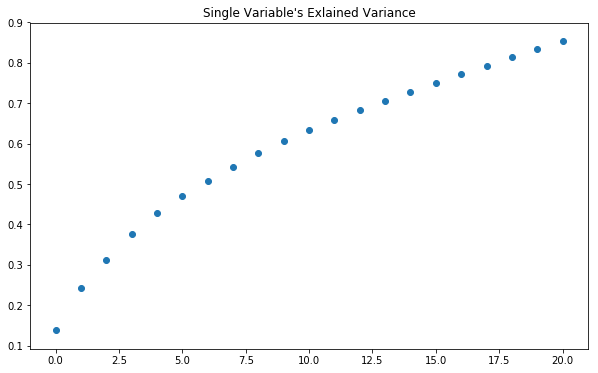

In [244]:
pca = PCA(n_components=len(train_.columns)).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(len(train_.columns))), pca.explained_variance_ratio_.cumsum())
plt.title("Single Variable's Exlained Variance")

In [241]:
train_ = pd.read_csv("train_eng_3.csv"); test_  = pd.read_csv("test_eng_3.csv")
train_ = train_.drop(get_redundant_columns(), axis=1)
test_ = test_.drop(get_redundant_columns(), axis=1)

In [261]:
train_solved

id  event_order  student  item                             start  \
0           4            1       29     2  2017-11-10 12:20:05.152265+00:00   
1           5            2       29    12  2017-11-10 12:20:32.155447+00:00   
2           6            3       29    10  2017-11-10 12:20:54.080259+00:00   
3           7            4       29    14  2017-11-10 12:21:06.966330+00:00   
4           8            5       29    11  2017-11-10 12:21:33.061485+00:00   
5           9            6       29     1  2017-11-10 12:22:14.768707+00:00   
6          10            7       29     3  2017-11-10 12:22:42.455442+00:00   
7          11            8       29    49  2017-11-10 12:23:06.409399+00:00   
8          12            9       29    17  2017-11-10 12:23:23.127216+00:00   
9          13           10       29     8  2017-11-10 12:24:07.602156+00:00   
10         16           11      584     2  2017-11-12 08:33:42.535936+00:00   
11         17           12      584    31  2017-11-12 08:36:17.796933+00:00   
12         18           13      584    12  2017-11-12 08:37:31.844203+00:00   
13         19           14      584     8  2017-11-12 08:38:23.728383+00:00   
14         20           15      584     6  2017-11-12 08:39:19.885045+00:00   
15         21           16      584    13  2017-11-12 08:42:03.346800+00:00   
16         22           17      584    23  2017-11-12 08:45:31.357977+00:00   
17         23           18      584    21  2017-11-12 08:47:03.994079+00:00   
18         24           19      584     3  2017-11-12 08:48:30.172061+00:00   
19         25           20      584    53  2017-11-12 08:49:58.723520+00:00   
20         26           21      584    17  2017-11-12 08:50:37.636168+00:00   
21         27           22      584    50  2017-11-12 08:53:25.954833+00:00   
22         28           23      584    41  2017-11-12 08:57:39.741460+00:00   
23         30           24      584    37  2017-11-12 08:59:24.912358+00:00   
24         31           25      584    60  2017-11-12 09:00:34.676681+00:00   
25         32           26      584    55  2017-11-12 09:06:42.290558+00:00   
26         34           27      769    31  2017-11-12 23:27:20.552363+00:00   
27         35           28      769    49  2017-11-12 23:29:22.225442+00:00   
30         42           31      971    31  2017-11-13 15:06:13.983979+00:00   
34         55           35     1219    44  2017-11-14 09:58:13.742272+00:00   
...       ...          ...      ...   ...                               ...   
98194  107630        98195    16373    66  2019-03-30 09:27:53.005964+00:00   
98195  107631        98196    16373    10  2019-03-30 09:28:53.746833+00:00   
98196  107632        98197    16373     8  2019-03-30 09:29:22.214979+00:00   
98197  107633        98198    16373    12  2019-03-30 09:30:06.975628+00:00   
98198  107634        98199    16373     6  2019-03-30 09:30:40.406525+00:00   
98199  107635        98200    16373    23  2019-03-30 09:32:04.423908+00:00   
98200  107636        98201    16373    19  2019-03-30 09:33:13.821232+00:00   
98201  107637        98202    16373    79  2019-03-30 09:36:45.398781+00:00   
98202  107638        98203    16373    11  2019-03-30 09:38:23.376115+00:00   
98203  107639        98204    16373     1  2019-03-30 09:39:01.585215+00:00   
98204  107640        98205    16373    71  2019-03-30 09:40:40.440520+00:00   
98205  107641        98206    16373    70  2019-03-30 09:42:05.810300+00:00   
98206  107642        98207    16373    76  2019-03-30 09:43:57.187639+00:00   
98207  107643        98208    16374    51  2019-03-31 09:43:57.077720+00:00   
98208  107644        98209    16374    44  2019-03-31 09:44:11.708501+00:00   
98209  107645        98210    16374    67  2019-03-31 09:44:24.762726+00:00   
98210  107646        98211    16374    10  2019-03-31 09:44:43.344046+00:00   
98211  107647        98212    16374    12  2019-03-31 09:44:55.601362+00:00   
98212  107648        98213    16374    79  2019-03-31 09:45:1

In [278]:
train_solved = train_solved.drop(75398)

In [301]:
train_solved.at[75398, "time_int"] = 1

In [304]:
train_solved["time_int"].isna().any()

False

In [313]:
test.iloc[0]

id                                                 107662
event_order                                         98227
student                                             16376
item                                                   51
start                    2019-04-01 06:41:15.396558+00:00
item_setting                                           85
item_solution                                         fff
item_order                                              1
solved                                               True
time                                              3.09104
response_time_sec                                      22
executions                                              1
edits                                                   3
program                                              1227
startYear                                            2019
startMonth                                              4
startWeek                                              14
startDay      

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning:

Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning:

Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning:

Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning:

Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\preprocessing\data

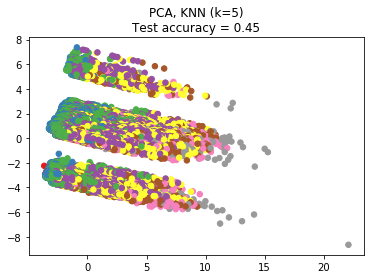

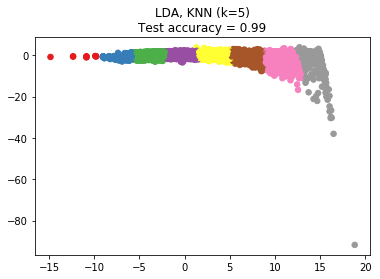

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_neighbors = 5
random_state = 0
X = train_solved.drop(["time_int", "start", "item_solution"], axis=1); y = train_solved["time_int"]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.5, stratify=y,
                     random_state=random_state)

dim = X.shape[0]
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)
    print(knn.predict())

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()

In [232]:
pca

array([[-1.50648975, -7.07409048, -0.02736572, ..., -0.16295809,
         0.51929571, -0.7657106 ],
       [-1.33778947, -7.06047471, -0.06101694, ..., -0.23808668,
         0.51519242, -0.68204314],
       [-1.71346465, -7.14131897, -0.23947944, ..., -0.16311579,
         0.49425536, -0.66026637],
       ...,
       [ 3.29614953,  4.02377417,  0.57566531, ...,  0.3854665 ,
         2.19888456,  2.21162809],
       [ 2.10663509,  3.77234539,  0.02682804, ...,  0.4455887 ,
         2.20076545,  2.21412616],
       [ 2.8209019 ,  3.90847852,  0.26441738, ...,  0.34349321,
         2.21366932,  2.24604983]])

In [225]:
from sklearn.cluster import KMeans
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

kmeans = KMeans(n_clusters=9)
kmeans_ = kmeans.fit_predict(reduced)
data = [
    go.Scatter(
        x= reduced[:, 0], 
        y= reduced[:, 1], 
        mode="markers",
        showlegend=False,
        marker=dict(
            size=8,
            color = kmeans_,
            colorscale = 'Rainbow',
            showscale=False, 
            line = dict(
                width = 2,
                color = 'rgb(255, 255, 255)'
            )))]

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= True
)

fig = dict(data = data, layout = layout)
#py.iplot(fig, filename="kmeans_plot")

In [223]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)

x_lda = lda.fit_transform(X.drop(["time_int"], axis=1), X["time_int"].values)

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning:

Variables are collinear.



In [229]:
data = [
    go.Scatter(
    x = x_lda[:,0],
    y = x_lda[:,1],
    mode = 'markers',
    showlegend = True,
    marker = dict(
        size = 8,
        color = X["time_int"],
        colorscale ='Rainbow',
        showscale = False,
        opacity = 0.8,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
    )
)]

layout = go.Layout(
    title= 'Linear Discriminant Analysis (LDA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Linear Discriminant',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Linear Discriminant',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= False
)

fig = dict(data=data, layout=layout)
#py.iplot(fig, filename="lda_plot")

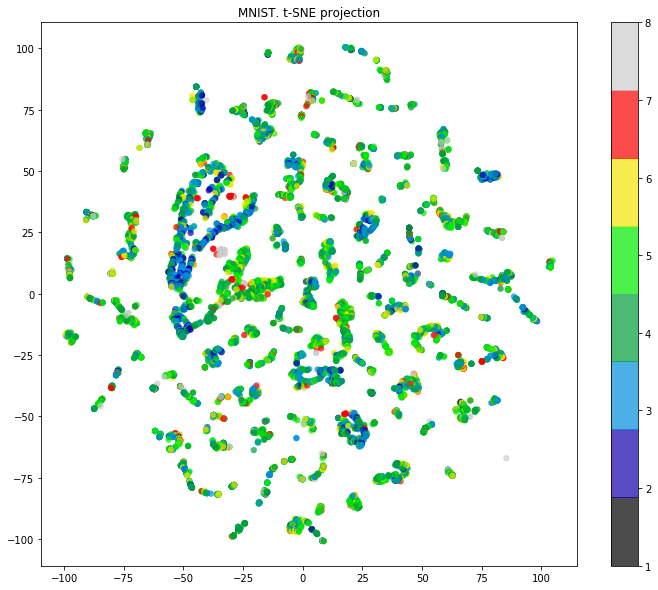

In [316]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(train_solved.drop(["start", "item_solution"], axis=1)[:10000])

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=train_solved["time_int"][:10000], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 8))
plt.colorbar()
plt.title('MNIST. t-SNE projection');

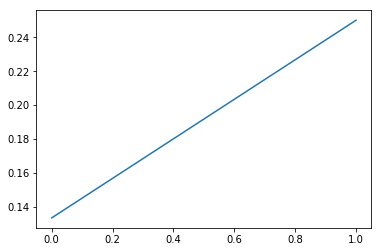

In [56]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

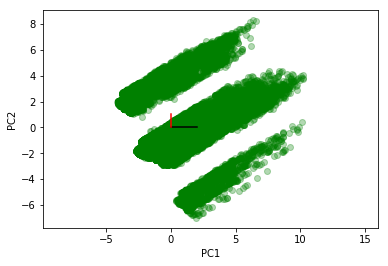

In [57]:
PC = pca.transform(X_train_scaled)
plt.scatter(PC[:,0], PC[:,1], alpha=0.3, color='g')

# Plot first principal component in black
plt.plot([0, 2], [0, 0], 'k')

# Plot second principal component in red
plt.plot([0, 0], [0, 1], 'r')

# Set axes
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Clear text residue
plt.show()

In [58]:
pca.explained_variance_ratio_


array([0.13353843, 0.11646617])

In [20]:
# TBD: PCA
# https://github.com/TerkaSlaninakova/data-science-portfolio/blob/master/_book_Introduction_to_Machine_Learning/Useful%20tricks%20with%20Unsupervised%20learning%2C%20Scaling%2C%20PCA%2C%20NMF%2C%20t-SNE%2C%20clustering.ipynb

In [21]:
# TBD: t-SNE

In [ ]:
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.cluster import DBSCAN